In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
train_df = pd.read_csv('Train Data.csv')
validation_df = pd.read_csv('Validation Data.csv')
test_df = pd.read_csv('Test Data.csv')

In [3]:
train_df['has_ci'] = np.where(train_df['131366-0.0'].notna(), 1, 0)
train_df = train_df.drop('131366-0.0', axis=1)

In [4]:
validation_df['has_ci'] = np.where(validation_df['131366-0.0'].notna(), 1, 0)
validation_df = validation_df.drop('131366-0.0', axis=1)

In [5]:
test_df['has_ci'] = np.where(test_df['131366-0.0'].notna(), 1, 0)
test_df = test_df.drop('131366-0.0', axis=1)
test_df

,eid,31-0.0,49-0.0,50-0.0,96-0.0,102-0.0,874-0.0,894-0.0,914-0.0,981-0.0,...,24011-0.0,24012-0.0,24013-0.0,24014-0.0,24015-0.0,24016-0.0,24017-0.0,24018-0.0,24019-0.0,has_ci
0,1000722,1,114.0,178.0,63.0,68.0,15.0,60.0,20.0,NaN,...,49985.0,0.00090,0.0,0.0,0.00,21.49,18.85,20.44,20.42,0
1,1001441,1,106.0,184.0,149.0,81.0,30.0,20.0,NaN,NaN,...,16530.0,0.00253,0.0,0.0,0.00,44.21,40.18,48.17,26.17,0
2,1003252,1,113.0,176.0,71.0,65.0,15.0,30.0,40.0,3.0,...,13607.0,0.00353,0.0,0.0,0.00,34.71,30.67,32.59,21.48,1
3,1004088,0,98.0,164.0,55.0,73.0,12.0,NaN,10.0,7.0,...,9249.0,0.00117,0.0,0.0,0.00,20.17,20.05,21.14,20.38,0
4,1004342,1,100.0,177.0,189.0,67.0,20.0,10.0,NaN,2.0,...,15888.0,0.00049,0.0,0.0,0.00,20.12,19.85,20.28,16.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,6022448,1,103.0,175.0,121.0,51.0,12.0,NaN,NaN,NaN,...,98272.0,0.02000,0.0,1.0,661.51,57.24,57.23,68.42,29.04,0
9857,6023099,1,108.0,171.0,124.0,75.0,20.0,60.0,NaN,NaN,...,13618.0,0.00463,0.0,0.0,0.00,27.60,26.77,27.01,21.55,0
9858,6023281,1,99.0,172.0,142.0,57.0,60.0,300.0,120.0,NaN,...,20207.0,0.00139,0.0,0.0,0.00,25.16,25.56,26.29,20.91,0
9859,6023658,0,100.0,171.0,69.0,64.0,60.0,30.0,60.0,4.0,...,20035.0,0.00658,0.0,0.0,0.00,33.10,31.94,37.24,25.36,0


In [6]:
# Handling Nan values of train

mean_imputer = SimpleImputer(strategy='mean')

train_imputer = mean_imputer.fit_transform(train_df)
train_df = pd.DataFrame(train_imputer, columns=train_df.columns)

In [7]:
# Handling Nan values of validation

valid_imputer = mean_imputer.fit_transform(validation_df)
validation_df = pd.DataFrame(valid_imputer, columns=validation_df.columns)

In [8]:
# Handling Nan values of test

test_imputer = mean_imputer.fit_transform(test_df)
test_df = pd.DataFrame(test_imputer, columns=test_df.columns)

test_df

,eid,31-0.0,49-0.0,50-0.0,96-0.0,102-0.0,874-0.0,894-0.0,914-0.0,981-0.0,...,24011-0.0,24012-0.0,24013-0.0,24014-0.0,24015-0.0,24016-0.0,24017-0.0,24018-0.0,24019-0.0,has_ci
0,1000722.0,1.0,114.0,178.0,63.0,68.0,15.0,60.000000,20.000000,3.576186,...,49985.0,0.00090,0.0,0.0,0.00,21.49,18.85,20.44,20.42,0.0
1,1001441.0,1.0,106.0,184.0,149.0,81.0,30.0,20.000000,40.468869,3.576186,...,16530.0,0.00253,0.0,0.0,0.00,44.21,40.18,48.17,26.17,0.0
2,1003252.0,1.0,113.0,176.0,71.0,65.0,15.0,30.000000,40.000000,3.000000,...,13607.0,0.00353,0.0,0.0,0.00,34.71,30.67,32.59,21.48,1.0
3,1004088.0,0.0,98.0,164.0,55.0,73.0,12.0,59.697531,10.000000,7.000000,...,9249.0,0.00117,0.0,0.0,0.00,20.17,20.05,21.14,20.38,0.0
4,1004342.0,1.0,100.0,177.0,189.0,67.0,20.0,10.000000,40.468869,2.000000,...,15888.0,0.00049,0.0,0.0,0.00,20.12,19.85,20.28,16.93,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9856,6022448.0,1.0,103.0,175.0,121.0,51.0,12.0,59.697531,40.468869,3.576186,...,98272.0,0.02000,0.0,1.0,661.51,57.24,57.23,68.42,29.04,0.0
9857,6023099.0,1.0,108.0,171.0,124.0,75.0,20.0,60.000000,40.468869,3.576186,...,13618.0,0.00463,0.0,0.0,0.00,27.60,26.77,27.01,21.55,0.0
9858,6023281.0,1.0,99.0,172.0,142.0,57.0,60.0,300.000000,120.000000,3.576186,...,20207.0,0.00139,0.0,0.0,0.00,25.16,25.56,26.29,20.91,0.0
9859,6023658.0,0.0,100.0,171.0,69.0,64.0,60.0,30.000000,60.000000,4.000000,...,20035.0,0.00658,0.0,0.0,0.00,33.10,31.94,37.24,25.36,0.0


In [9]:
x_train = train_df.drop('has_ci', axis=1)
y_train = train_df['has_ci']

In [10]:
x_validation = validation_df.drop('has_ci', axis=1)
y_validation = validation_df['has_ci']

In [11]:
x_test = test_df.drop('has_ci', axis=1)
y_test = test_df['has_ci']

In [12]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

In [13]:
x_validation_scaled = scaler.fit_transform(x_validation)

In [14]:
x_test_scaled = scaler.fit_transform(x_test)

In [15]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [16]:
y_validation_pred = model.predict(x_validation_scaled)

# Evaluate the model train performance
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_report = classification_report(y_validation, y_validation_pred)
print("Validation Accuracy: ", validation_accuracy)
print("Validation Report: \n", validation_report)

Validation Accuracy:  0.7996197718631178
Validation Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      6297
         1.0       0.55      0.04      0.08      1593

    accuracy                           0.80      7890
   macro avg       0.68      0.52      0.48      7890
weighted avg       0.75      0.80      0.72      7890



In [17]:
# predict on the test set

y_test_pred = model.predict(x_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print("Test Accuracy: ", test_accuracy)
print("Test Report: \n", test_report)

Test Accuracy:  0.7970794037115911
Test Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      7847
         1.0       0.54      0.04      0.08      2014

    accuracy                           0.80      9861
   macro avg       0.67      0.52      0.48      9861
weighted avg       0.75      0.80      0.72      9861



In [18]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns, 
        'Coefficients': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }
)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
top_10_features = feature_importance.head(20)
print(top_10_features)

      Features  Coefficients  Abs_Coefficient
112  24017-0.0      0.395346         0.395346
87    4080-0.0      0.370869         0.370869
113  24018-0.0     -0.354112         0.354112
1       31-0.0      0.271054         0.271054
3       50-0.0     -0.186990         0.186990
92   20116-0.0      0.133222         0.133222
15    1190-0.0      0.126911         0.126911
86    4079-0.0     -0.119992         0.119992
97   21002-0.0      0.094042         0.094042
16    1200-0.0      0.090553         0.090553
34    1408-0.0     -0.087505         0.087505
27    1329-0.0      0.086071         0.086071
20    1249-0.0     -0.083561         0.083561
18    1220-0.0      0.074845         0.074845
91    6144-0.0     -0.074807         0.074807
10    1050-0.0      0.073800         0.073800
83    2100-0.0      0.070870         0.070870
30    1359-0.0     -0.067183         0.067183
50    1618-0.0      0.062776         0.062776
53    1677-0.0     -0.061666         0.061666


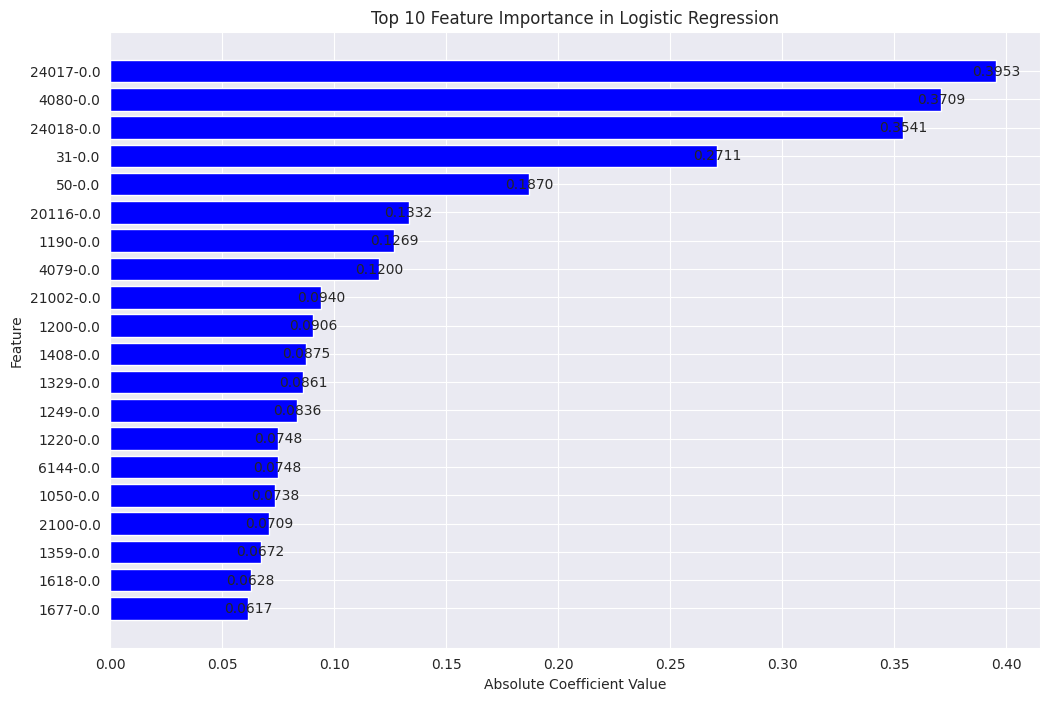

In [19]:
# Visualize the feature importance
plt.figure(figsize=(12,8))
plt.barh(top_10_features['Features'], top_10_features['Abs_Coefficient'], color='blue')

for index, value in enumerate(top_10_features['Abs_Coefficient']):
    plt.text(value, index, f'{value:.4f}', va='center', ha='center', fontsize=10)
    
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [20]:
y_test_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
sorted_array = sorted(y_test_pred_proba, reverse=True)
sorted_array[:10]

[np.float64(0.8142579340325519),
 np.float64(0.7637331175082663),
 np.float64(0.7138484524633772),
 np.float64(0.7126336660375701),
 np.float64(0.7104238680460564),
 np.float64(0.6768169401126513),
 np.float64(0.6703630179051637),
 np.float64(0.6667835489173515),
 np.float64(0.6666594069638277),
 np.float64(0.6638982638746928)]